# TFM Figures

In [7]:
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


## Import libraries

In [8]:
# to reload automatically the changes in the scripts.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
import sys
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
tqdm.pandas()
%matplotlib inline

## my modules ##
sys.path.append("../scripts/Utils/")    # modules folder
from motif_utils import motif_scan_flex, motif_logo
from fasta_utils import readFasta_gzip
from stabch_utils import *
from plots_utils import *
from loads_utils import load_bg_aa

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

## Define paths

In [11]:
base = "../"
cluster = "/workspace/projects/degrons/"

data = "data/"
results = "results/"

ubinet_validation_path = os.path.join(base, results,
                                 "ubinet_meme_validation_wth_elm_manual/ubinet_meme_validation_wth_elm_manual.tsv")

n_hits_per_protein_elm_manual_path = os.path.join(base, results, 
"quality_analysis/quality_analysis_elm_manual/proteome70k/hits_per_protein_elm_manual_new_version_infocont.tsv.gz")
qa_elm_manual_path = os.path.join(base, results, 
"quality_analysis/quality_analysis_elm_manual/proteome70k/motifs_quality_analysis_elm_manual_new_version_infocont.tsv.gz")
elm_manual_pos_scan_path = os.path.join(base, data, "elm_manual/scan_70k/positive_set_scan/")
elm_manual_nopos_scan_path = os.path.join(base, data, "elm_manual/scan_70k/no_positive_set_scan/")
elm_manual_pos_set_path = os.path.join(base, data, 
                                  "elm_manual/positive_set/positive_set_dataframe/positive_set_elm_manual/")
elm_manual_enrich_pos_set_path = os.path.join(base, data, 
                        "elm_manual/positive_set/positive_set_fasta/positive_set_def_pwms_elm_manual/")
elm_manual_pwms_path = os.path.join(base, data, "elm_manual/motif_matrices/PWM/")

proteome_path = os.path.join(base, data, "external/uniprot/uniprot_proteome_UP000005640.fasta.gz")
small_proteome_path = os.path.join(base, data, "external/biomart/biomart92_proteome_cantranscripts_uniq_prepro.fasta.gz")

stabch_panc_cptac_path = os.path.join(base, results, "stability_change_annot_degrons/CPTAC_CCLE_MS_3/stability_change_cptacms.tsv.gz")
stabch_panc_ccle_path = os.path.join(base, results, "stability_change_annot_degrons/CPTAC_CCLE_MS_3/stability_change_cclems_wth_ctype.tsv.gz")

aa_bg_path = os.path.join(base, data, "external/aminoacid_frequency.txt")

plots_path = os.path.join(base, "tfm/figures/")


## Load data

### UbiNet validation with ELM degron instances

In [14]:
ubinet_validation = pd.read_csv(ubinet_validation_path, sep = "\t")
ubinet_validation = ubinet_validation.loc[ubinet_validation.Dataset == "UbiNet"]

### Quality analysis

In [12]:
qa_elm_manual = pd.read_csv(qa_elm_manual_path, sep = "\t", compression = 'gzip')

In [7]:
n_hits_per_protein_elm_manual = pd.read_csv(n_hits_per_protein_elm_manual_path, 
                                            sep = "\t", index_col = 0, compression = 'gzip')

### PWMs scans (positive and non-positive sets)

In [13]:
e3_scans_pos_dict = {}
e3_scans = os.listdir(elm_manual_pos_scan_path)
for e3 in e3_scans:
    with open(elm_manual_pos_scan_path+e3) as fp:
        e3_scans_pos_dict[e3.split(".")[0]] = json.load(fp)

In [14]:
e3_scans_nopos_dict = {}
e3_scans = os.listdir(elm_manual_nopos_scan_path)
for e3 in e3_scans:
    with open(elm_manual_nopos_scan_path+e3) as fp:
        e3_scans_nopos_dict[e3.split(".")[0]] = json.load(fp)

### PWMs

In [15]:
e3_pwms_dict = {}
e3_pwms = os.listdir(elm_manual_pwms_path)
for e3 in e3_pwms:
    e3_pwms_dict[e3.split(".")[0]] = pd.read_csv(elm_manual_pwms_path+e3, sep = "\t")

### Positive set dataframe

In [17]:
# elm-manual positive set
e3_pos_set_dict = {}
e3_pos_set = os.listdir(elm_manual_pos_set_path)
for e3 in e3_pos_set:
    e3_pos_set_dict[e3.split(".")[0]] = pd.read_csv(elm_manual_pos_set_path+e3, sep = "\t")

In [18]:
# elm-manual + enriched positive set
e3_enrich_pos_set_dict = {}
e3_enrich_pos_set = os.listdir(elm_manual_enrich_pos_set_path)
for e3 in e3_enrich_pos_set:
    e3_enrich_pos_set_dict[e3.split(".")[0]] = pd.read_csv(elm_manual_enrich_pos_set_path+e3, sep = "\t")

### UniProt proteome

In [16]:
proteome = readFasta_gzip(proteome_path)

Number of retrieved sequences: 78120



### Ensembl proteome

In [13]:
small_proteome = readFasta_gzip(small_proteome_path)

Number of retrieved sequences: 19302



### Stability change tables with degrons annotated

In [6]:
# CCLE MS
ccle_stabch = pd.read_csv(stabch_panc_ccle_path, sep = "\t", compression = "gzip")

In [7]:
# CPTAC MS
cptac_stabch = pd.read_csv(stabch_panc_cptac_path, sep = "\t", compression = "gzip")

## Figure 1. Generation of PWMs

### 1B. Degron motifs logos

In [86]:
aa_probs, aa_names = load_bg_aa(aa_bg_path)

KEAP1.fasta
SPOP.fasta
SIAH1.fasta
VHL.fasta
FBXO31.fasta
FBXW7.fasta
COP1.fasta
DTL.fasta
BTRC.fasta
MDM2.fasta
CBL_PTK.fasta
CBL_MET.fasta
APC_ABBA.fasta
DEG_APCC_TPR_1.fasta
APC_DBOX.fasta
APC_KENBOX.fasta
DEG_Kelch_KLHL3_1.fasta
DEG_Nend_UBRbox_4.fasta
CBLL1.fasta


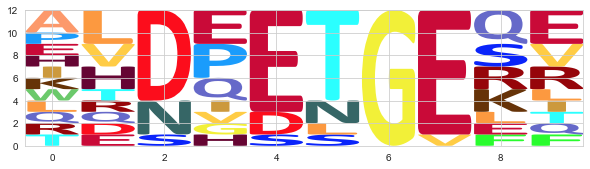

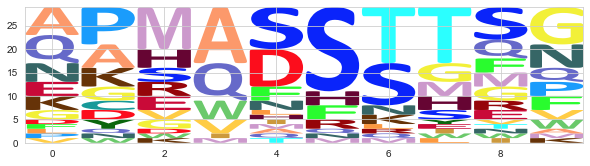

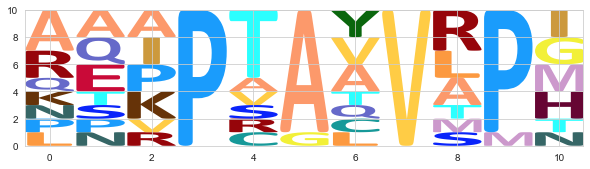

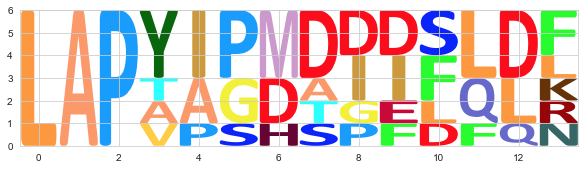

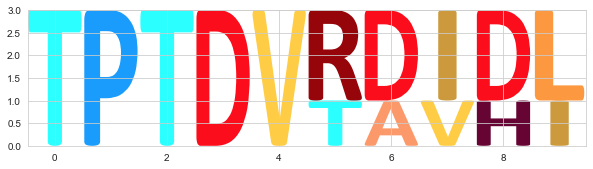

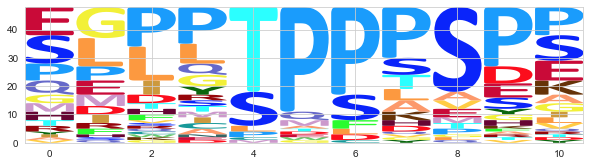

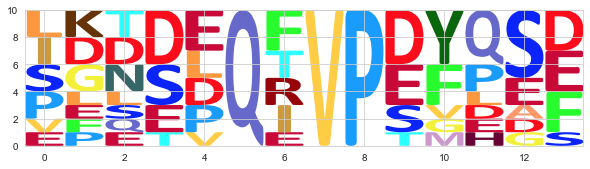

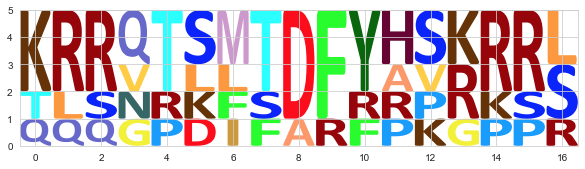

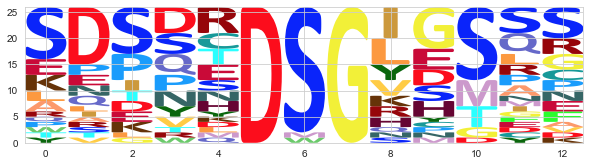

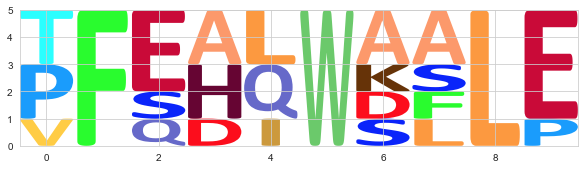

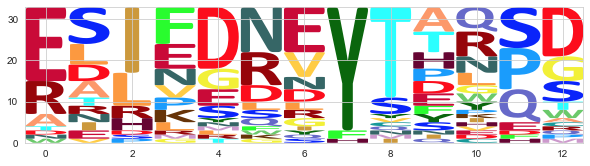

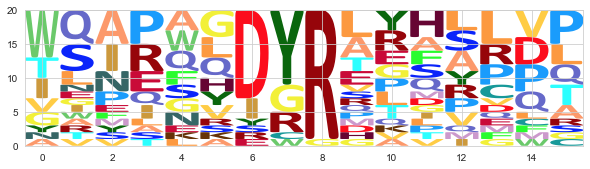

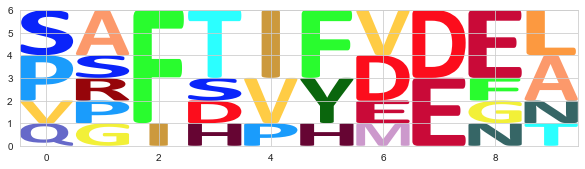

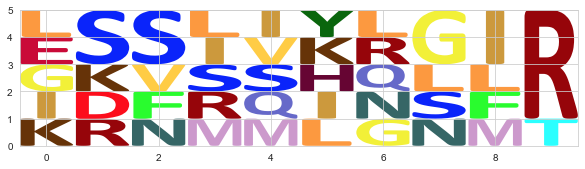

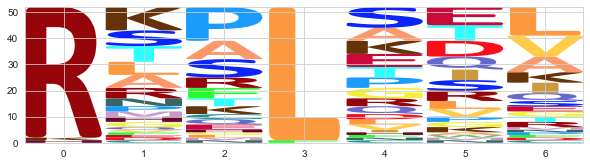

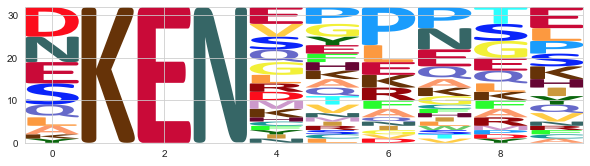

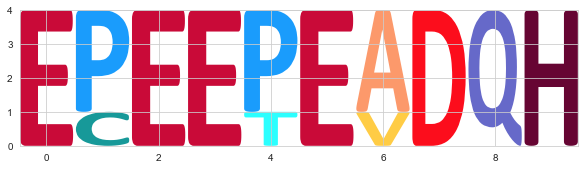

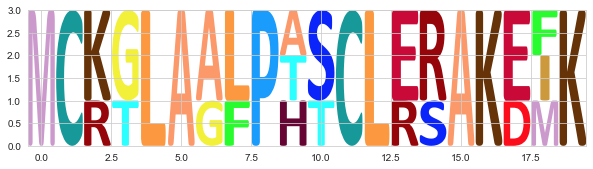

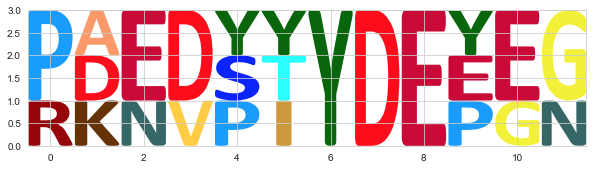

In [93]:
for E3 in os.listdir(elm_manual_enrich_pos_set_path):
    
    if E3.split(".")[-1] == "fasta":
        file = os.path.join(plots_path, "logos/", E3.split(".")[0]+".png")

        motif_logo(elm_manual_enrich_pos_set_path+E3, aa_names, file, format = "fasta")
        print(E3)
        

### 1C. Information content per E3 ligase

<AxesSubplot:xlabel='Degron motif', ylabel='Informational content\n per position'>

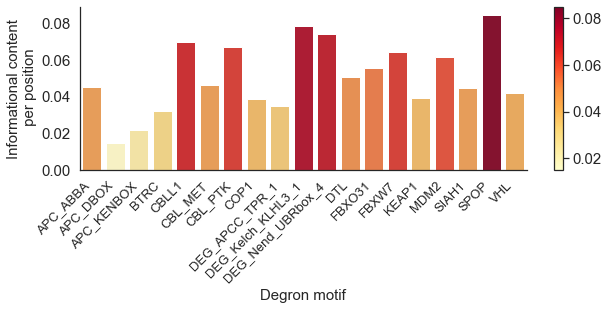

In [452]:
file = os.path.join(plots_path, "info_content_barplot.png")
barplot_qa_property(qa_elm_manual, "motif_info_content", 
                    "Informational content\n per position",
                    file, fig_width = 10, fig_height = 3)

### S1. UbiNet validation with ELM-Manual degron instances

In [22]:
def add_validated_e3(row):
    
    score = row.Score
    e3_ligase = row.E3_ligase
    
    if row.Score != 0:
        if row.E3_ligase == "Q969H0":
            row["E3_ligase_symb"] = "FBXW7"
        elif row.E3_ligase == "Q96J02":
            row["E3_ligase_symb"] = "ITCH"
    else:
        row["E3_ligase_symb"] = "others"
    
    return row

In [23]:
ubinet_validation = ubinet_validation.apply(lambda row: add_validated_e3(row), axis = 1)

In [43]:
def one_stripplot(df, plot_file, fig_width = 6, fig_height = 10):
    
    palette = {"others": "grey", "FBXW7": "#fb9a99", "ITCH": "#1f78b4"}
    sns.set_style(style = 'whitegrid')
    plt.figure(figsize = (fig_width, fig_height))
    ax = sns.stripplot(x = "Dataset", y = "Score", data = df,
                alpha = 0.7, size = 5, color = "#31a354",
                jitter = True, dodge = False, hue = "E3_ligase_symb",
                 palette = palette)
#     sns.violinplot(x = "Dataset", y = "Score", data = df,
#                         width = 0.7, saturation = 0.7, fliersize = 0., 
#                         linewidth = 1, color = "#addd8e")
    
    plt.xticks(np.arange(1), [""], fontsize = 18)
    plt.yticks(fontsize = 15)
    plt.ylabel("PWM Score", fontsize = 15)
    plt.xlabel("", fontsize = 15)
    plt.title("ELM-Manual degrons", fontsize = 18)
    
    legend_cols_dict = [Line2D([0],[0], color ='w', markerfacecolor = "#fb9a99", marker = 'o', 
                               markersize = 8, label = 'FBXW7'),
                       Line2D([0],[0], color ='w', markerfacecolor = "#1f78b4", marker = 'o', 
                               markersize = 8, label = "ITCH")]
                        
    legend = ax.legend(handles = legend_cols_dict, bbox_to_anchor = (1.55, .9),
                         fontsize = 12, framealpha = 0.3)
    ax.add_artist(legend)
        
    plt.savefig(plot_file, dpi = 800, transparent = True, bbox_inches = "tight")
    
    return ax

<AxesSubplot:title={'center':'ELM-Manual degrons'}, ylabel='PWM Score'>

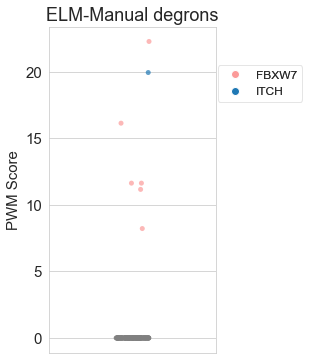

In [44]:
file = os.path.join(plots_path, "ubinet_elm_validation_violinplot.png")
one_stripplot(ubinet_validation, file, fig_width = 3, fig_height = 6)

## Figure 2. Degron annotation in the human proteome. Supplementary S4.

### 2B. Different distribution between random sequences and positive set: positivity threshold

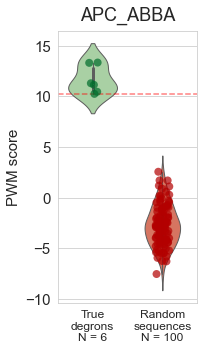

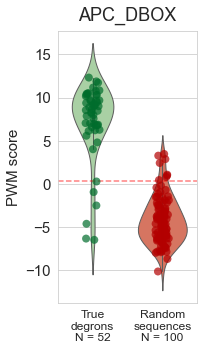

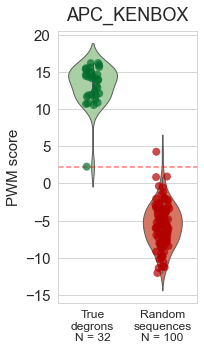

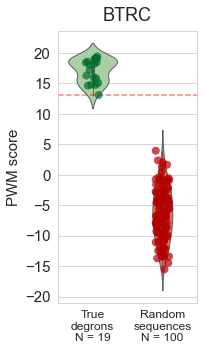

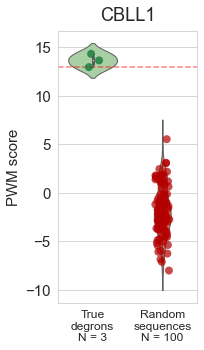

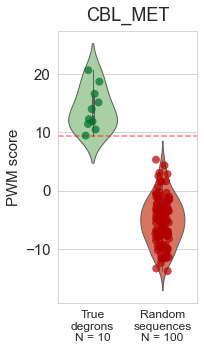

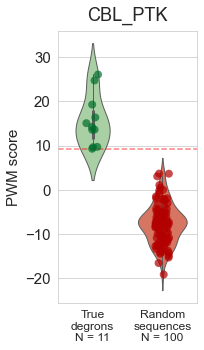

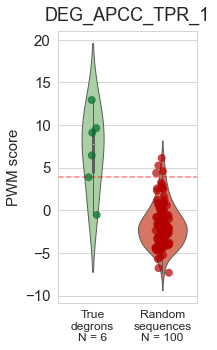

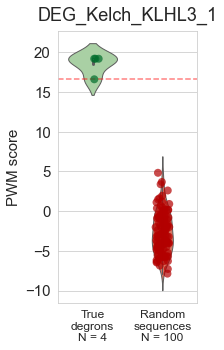

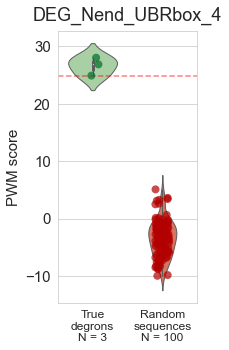

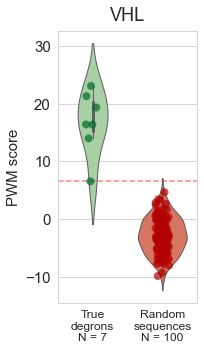

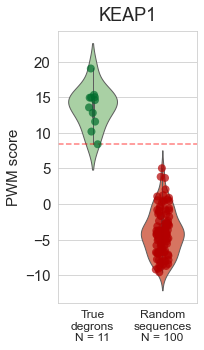

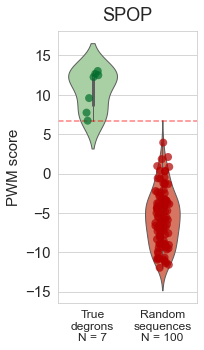

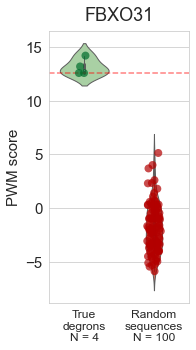

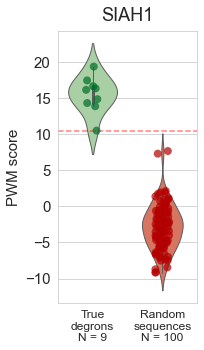

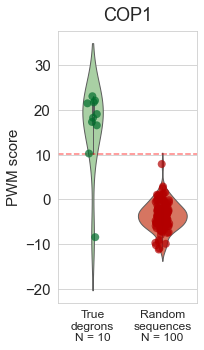

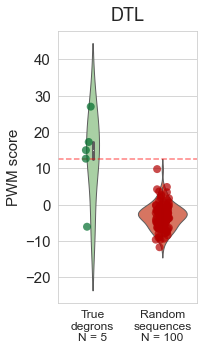

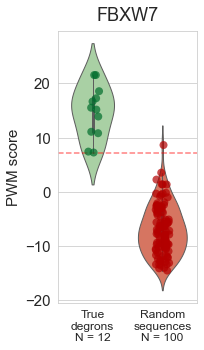

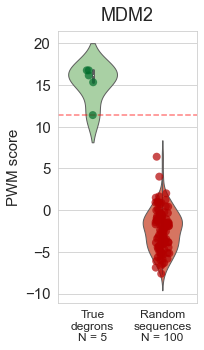

In [34]:
for E3 in e3_pwms_dict:
    
    file = os.path.join(plots_path, "pos_vs_random_violinplots/"+E3+".png")
    pwm = e3_pwms_dict[E3]
    pos_set = e3_pos_set_dict[E3]
    nopos_scan = e3_scans_nopos_dict[E3]
    
    violinplot_pos_threshold(pwm, pos_set, nopos_scan, qa_elm_manual, E3, proteome, file, n_samples = 100,
                             negatives_to_zero = False, fig_width = 2.5, fig_height = 5)

### 2C. Degron specificity: correlation values between number of hits and protein's length

<AxesSubplot:xlabel='Degron motif', ylabel='Correlation index'>

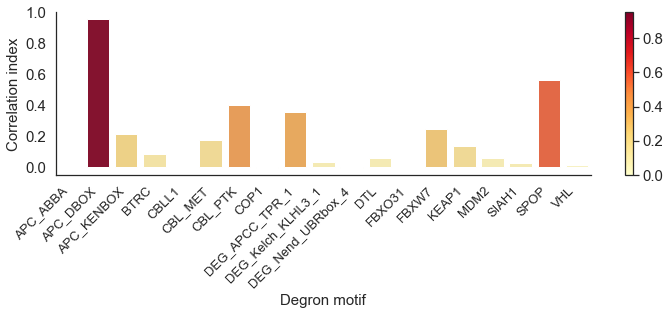

In [453]:
file = os.path.join(plots_path, "specificity_corr_barplot.png")
barplot_qa_property(qa_elm_manual, "correlation_hits_vs_length_sequence", 
                    "Correlation index",
                   file, fig_width = 12, fig_height = 3)

### 2E. Degron discovery activity: per protein 

(<AxesSubplot:>, <AxesSubplot:xlabel='Degron motif'>)

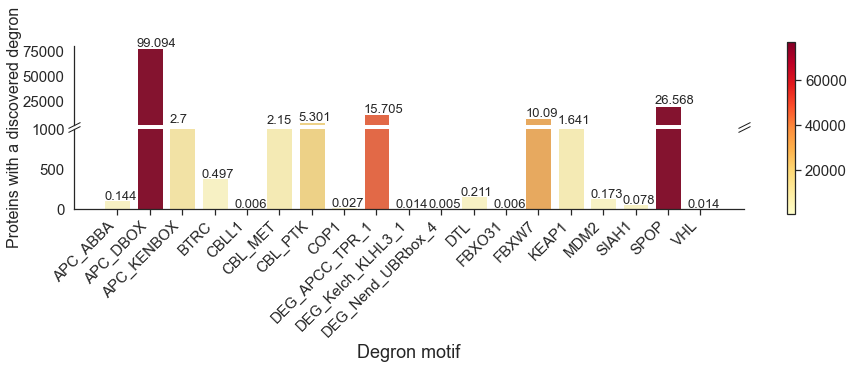

In [456]:
# per protein
file = os.path.join(plots_path, "discov_activity_protein_barplot.png")
barplot_broken_axis_qa_property(qa_elm_manual, "number_positive_hits",
                                "Proteins with a discovered degron\n", plot_file = file,
                                y_lim_high = (1000, 80000), y_lim_low = (0, 1000),
                                low_pad_x = 0, high_pad_x = 0, low_pad_y = 10, high_pad_y = 1500,
                                font_y = 16, property_percentage = "percent_positive_hits",
                                n_remove_outliers = 1, fig_width = 12, fig_height = 3)

### 2D. Examples of specificity: correlation between the number of hits per protein and its length

APC_DBOX
MDM2


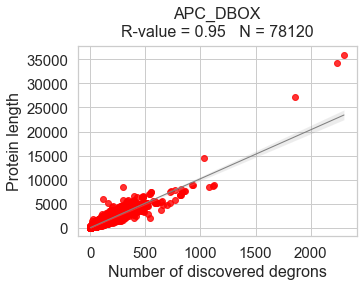

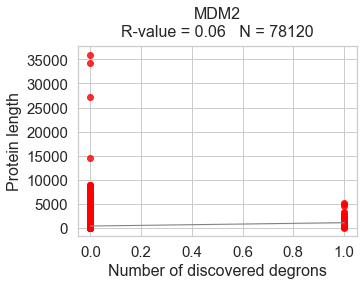

In [459]:
E3s = ["APC_DBOX", "MDM2"]

for E3 in E3s:
    print(E3)
    file = os.path.join(plots_path, "specificity_scatterplots/"+E3+".png")
    hits_length_scatterplot(qa_elm_manual, n_hits_per_protein_elm_manual, E3, file, font_y = 16, font_x = 16,
                           fig_width = 5, fig_height = 3.5)

### S4A. Degron discovery activity: per protein subsequence

(<AxesSubplot:>, <AxesSubplot:xlabel='Degron motif'>)

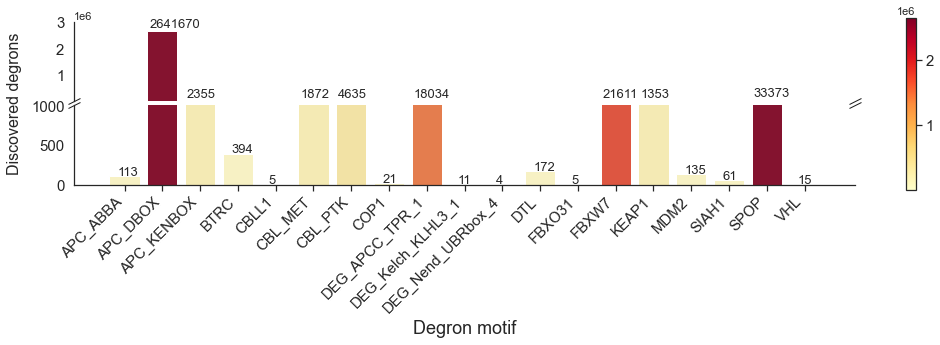

In [461]:
# per protein subsequence
file = os.path.join(plots_path, "discov_activity_subseq_barplot.png")
barplot_broken_axis_qa_property(qa_elm_manual, "number_positive_hits_subseq",
                                "Discovered degrons\n", plot_file = file,
                                y_lim_high = (3000, 3000000), y_lim_low = (0, 1000),
                                low_pad_x = .22, high_pad_x = .05, low_pad_y = 10, high_pad_y = 150000,
                                font_y = 16, n_remove_outliers = 1,  fig_width = 14, fig_height = 3)

### S4B. True degrons discovery

<AxesSubplot:xlabel='Degron motif', ylabel='% of true degrons discovered'>

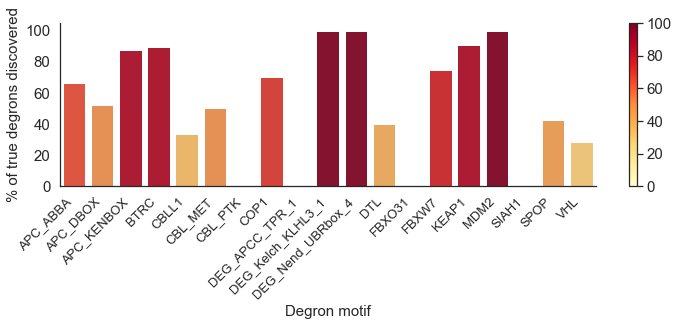

In [462]:
file = os.path.join(plots_path, "discov_activity_true_degrons_barplot.png")
barplot_qa_property(qa_elm_manual, "percent_discovery_msa_seqs", 
                    "% of true degrons discovered", file, fig_width = 12, fig_height = 3)

## Figure 3. Degron validation through non-truncating (missense and inframe) mutations. Supplementary S6

### 3A. Overview of the datasets

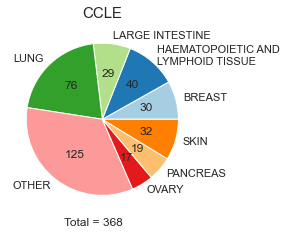

In [534]:
file = os.path.join(plots_path, "ccle_piechart.png")
dataset = "CCLE"
palette = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6",
           "#6a3d9a", "#ffff99"]

dataset_piechart(ccle_stabch, "sample", "cancer_type", dataset, palette, file,
                fig_width = 5, fig_height = 3.5)

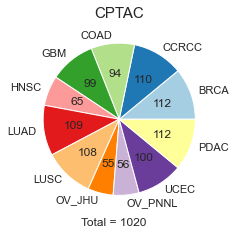

In [471]:
file = os.path.join(plots_path, "cptac_piechart.png")
dataset = "CPTAC"
palette = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99", "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6",
           "#6a3d9a", "#ffff99"]

dataset_piechart(cptac_stabch, "sample", "Cancer_type", dataset, palette, file,
                fig_width = 5, fig_height = 3.5)

### 3C. TP53 in LUAD (CPTAC): Stability change calculation

In [27]:
# Not filter with degrons info
ctype_stabch = pd.read_csv("/workspace/projects/degrons/data/stability_change/CPTAC/LUAD.gz", sep = "\t")

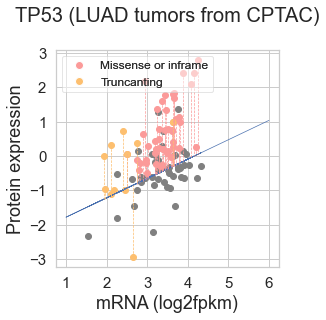

In [505]:
# To reproduce Martinez-Jimenez et al.: TP53 in COAD 
dataset = "CPTAC"
gene = "TP53"
ctype = "LUAD"

file = os.path.join(plots_path, "TP53_RNAvsProtein_scatterplot.png")
rna_vs_protein_scatterplot(ctype_stabch, gene, ctype, dataset, plot_file = file, regresline_lim_left = 1,
                          regresline_lim_right = 6, fig_width = 4, fig_height = 4)

### 3D. Boxplot of the stability change median per E3 ligase (CPTAC): WT, non-trunc in, non-trunc out

In [9]:
conditions = ["wt",
              "nontrunc_in_muts",
              "nontrunc_out_muts"]

palette = {"wt": "#33a02c",  
               "nontrunc_in_muts": "#e31a1c", 
               "nontrunc_out_muts": "#6a3d9a",
               }

In [12]:
dataset = "CPTAC"
file = os.path.join(plots_path, "stabch_nontrunc_cptac_boxplot.png")

cptac_subset = prepare_subsets_muttype_wthE3_dict(cptac_stabch, conditions, check_normality = False)

/home/rblanco/anaconda3/envs/degrons/lib/python3.9/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DEG_APCC_TPR_1_nontrunc_in_muts vs. DEG_APCC_TPR_1_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:2.780e-01 U_stat=1.313e+06
APC_KENBOX_wt vs. APC_KENBOX_nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:5.820e-01 U_stat=4.590e+06
APC_KENBOX_nontrunc_in_muts vs. APC_KENBOX_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:7.326e-01 U_stat=3.261e+04
CBL_PTK_wt vs. CBL_PTK_nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:1.516e-02 U_stat=2.630e+07
CBL_PTK_nontrunc_in_muts vs. CBL_PTK_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:6.125e-01 U_stat=1.561e+05
FBXW7_wt vs. FBXW7_nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:3.742e-01 U_stat=1.073e+08
FBXW7_nontrunc_in_muts vs. FBXW7_nontrunc_out_muts: Mann-Whitney-Wilcoxon test t

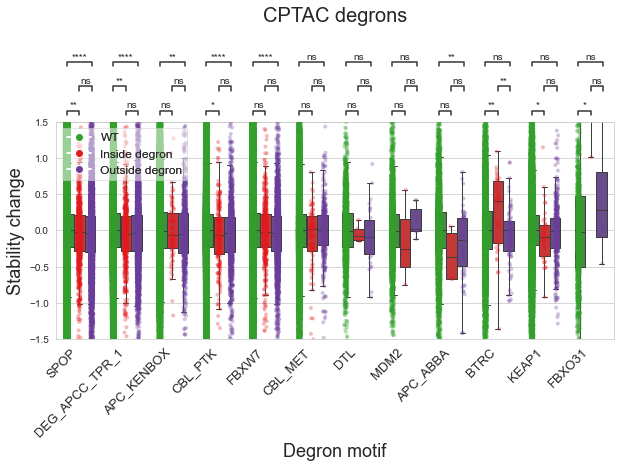

In [13]:
ax = stabch_E3ligase_boxplot(conditions, cptac_subset, dataset, cptac_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 10, fig_height = 4,
                plot_file = file, pad_stats = 100)

### S6. Boxplot of the stability change median per E3 ligase (CCLE): WT, non-trunc in, non-trunc out

In [10]:
dataset = "CCLE"
file = os.path.join(plots_path, "stabch_nontrunc_ccle_boxplot.png")

ccle_subset = prepare_subsets_muttype_wthE3_dict(ccle_stabch, conditions, check_normality = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FBXW7_nontrunc_in_muts vs. FBXW7_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:3.848e-01 U_stat=8.114e+05
SPOP_wt vs. SPOP_nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:1.577e-01 U_stat=1.602e+08
SPOP_nontrunc_in_muts vs. SPOP_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:4.300e-01 U_stat=4.541e+06
DEG_APCC_TPR_1_wt vs. DEG_APCC_TPR_1_nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:7.465e-02 U_stat=3.633e+07
DEG_APCC_TPR_1_nontrunc_in_muts vs. DEG_APCC_TPR_1_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:5.473e-01 U_stat=9.359e+05
DTL_wt vs. DTL_nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:9.088e-01 U_stat=1.969e+03
DTL_nontrunc_in_muts vs. DTL_nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:8.689e

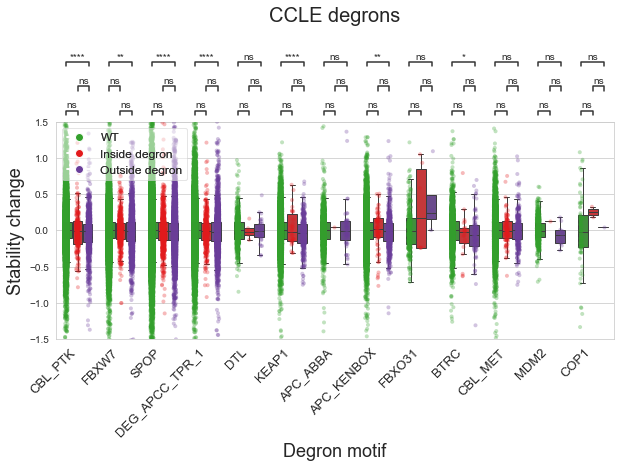

In [11]:
ax = stabch_E3ligase_boxplot(conditions, ccle_subset, dataset, ccle_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 10, fig_height = 4,
                plot_file = file, pad_stats = 100)

### 3E. CTNNB1 stability change: WT, non-trunc in, non-trunc out (CPTAC)

In [94]:
conditions = ["wt",
              "nontrunc_in_muts",
              "nontrunc_out_muts"]

palette = {"wt": "#33a02c",  
               "nontrunc_in_muts": "#e31a1c", 
               "nontrunc_out_muts": "#6a3d9a",
               }

In [95]:
groups_of_conditions = [["wt", "nontrunc_in_muts", "nontrunc_out_muts"]]

In [520]:
## BTRC degron in CTNNB1: position

cptac_stabch.loc[(cptac_stabch.E3 == "BTRC") & (cptac_stabch.gene == "CTNNB1")].groupby(
    ["gene", "E3", "degron_start", "degron_end"]).size()

gene    E3    degron_start  degron_end
CTNNB1  BTRC  27            39            2114
dtype: int64

In [96]:
file = os.path.join(plots_path, "stabch_nontrunc_BTRC_CTNNB1_boxplot.png")

dataset = "CPTAC"
E3 = "BTRC"
gene = "CTNNB1"
start = 27            # int64 checked with dtype
end = 39
title = E3+' degron in '+gene+' ('+str(start)+'-'+str(end)+') ('+dataset+')'

cptac_degron_subset = prepare_subsetsDegron_muttype_dict(cptac_stabch, conditions, E3, gene, start, end,
                                                  check_normality = False)



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

wt vs. nontrunc_in_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:5.096e-07 U_stat=2.980e+03
nontrunc_in_muts vs. nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:6.506e-03 U_stat=1.340e+02
wt vs. nontrunc_out_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:6.433e-01 U_stat=3.138e+03


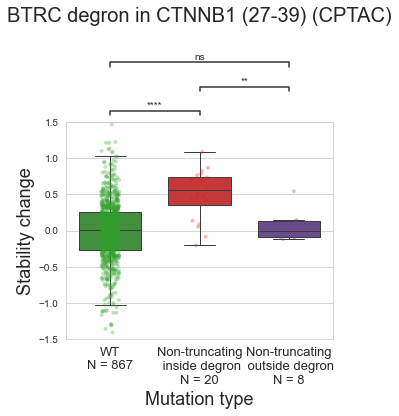

In [98]:
for group_cond in groups_of_conditions:

    # check whether all conditions exist for this E3 ligase
    if all(cond in list(cptac_degron_subset.keys()) for cond in group_cond):

        pairs = create_all_pairs(group_cond)
            
        ax = stabch_plot(group_cond, pairs, cptac_degron_subset, dataset, cptac_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                        do_stats = True, stripplot = True, E3 = E3, degron_features = "degron_instance",
                        custom_title = title, fig_width = 4.8, fig_height = 4, plot_file = file, pad_stats = 100)

### 3F. CTNNB1 stability change: needle plot with mutations matched to stability change oscillations

/home/rblanco/anaconda3/envs/degrons/lib/python3.9/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


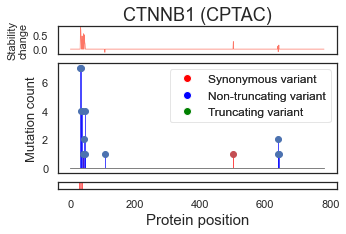

In [529]:
file = os.path.join(plots_path, "BTRC_CTNNB1_needleplot.png")

stabch_needle_plot("CTNNB1", small_proteome, cptac_stabch, "CPTAC", degron_start = 27, degron_end = 39,
                  degron_name = "BTRC degron", degron_name_fontsize = 9, fig_width = 5, fig_height = 3,
                  plot_file = file)

## Figure 4. Effect of degron disruption in truncanting alterations in the last exon

### 4A. Overall stability change levels comparison (CPTAC): wt, syn, non-truncanting and truncanting

In [535]:
conditions = ["wt",
              "syn_muts",
              "nontrunc_muts",
              "trunc_muts"]

pairs = [("wt", "trunc_muts"),
        ("syn_muts", "trunc_muts"),
        ("nontrunc_muts", "trunc_muts")]

palette = palette = {"wt": "#33a02c",
                     "syn_muts": "#a6cee3",
                     "nontrunc_muts": "#fb9a99",
                     "trunc_muts": "#fdbf6f"
                    }

In [536]:
dataset = "CPTAC"

cptac_subset = prepare_subsets_muttype_dict(cptac_stabch, conditions, check_normality = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

nontrunc_muts vs. trunc_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:3.071e-13 U_stat=5.804e+07
syn_muts vs. trunc_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:5.521e-17 U_stat=1.989e+07
wt vs. trunc_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:1.222e-26 U_stat=5.220e+09


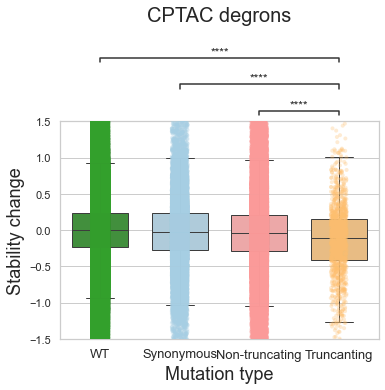

In [543]:
file = os.path.join(plots_path, "muttypes_cptac_boxplot.png")

ax = stabch_plot(conditions, pairs, cptac_subset, dataset, cptac_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 5.7, fig_height = 4,
                plot_file = file, pad_stats = 100)

### S6A. Overall stability change levels comparison (CCLE): wt, syn, non-truncanting and truncanting

In [544]:
dataset = "CCLE"

ccle_subset = prepare_subsets_muttype_dict(ccle_stabch, conditions, check_normality = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

nontrunc_muts vs. trunc_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:6.103e-13 U_stat=4.132e+07
syn_muts vs. trunc_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:2.138e-18 U_stat=1.898e+07
wt vs. trunc_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:8.225e-23 U_stat=8.854e+08


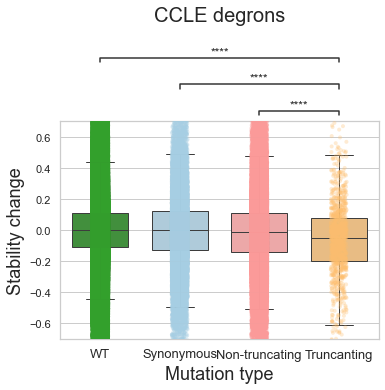

In [546]:
file = os.path.join(plots_path, "muttypes_ccle_boxplot.png")

ax = stabch_plot(conditions, pairs, ccle_subset, dataset, ccle_stabch, -0.7, 0.7, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 5.7, fig_height = 4,
                plot_file = file, pad_stats = 100)

### 4B. Overall stability change levels comparison (CPTAC): wt, syn, truncanting in/bf, truncanting after

In [561]:
conditions = ["wt",
              "syn_muts",
              "trunc_inbf_muts",
              "trunc_aft_muts"]

pairs = [("wt", "trunc_inbf_muts"),
        ("syn_muts", "trunc_inbf_muts"),
        ("trunc_inbf_muts", "trunc_aft_muts")]

palette = palette = {"wt": "#33a02c",
                     "syn_muts": "#a6cee3",
                     "trunc_inbf_muts": "#e31a1c",
                     "trunc_aft_muts": "#6a3d9a"
                    }

In [562]:
%notify

dataset = "CPTAC"

cptac_subset = prepare_subsets_muttype_dict(cptac_stabch, conditions, check_normality = False)

<IPython.core.display.Javascript object>

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

syn_muts vs. trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:5.155e-15 U_stat=8.194e+06
trunc_inbf_muts vs. trunc_aft_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:4.921e-03 U_stat=1.613e+05
wt vs. trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:1.551e-20 U_stat=2.151e+09


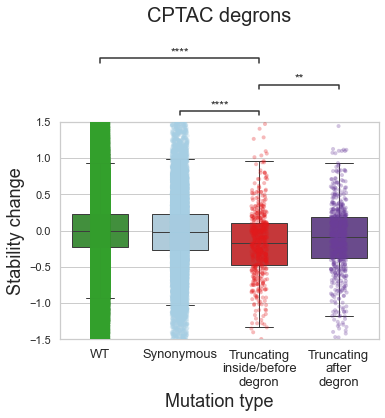

In [563]:
file = os.path.join(plots_path, "muttypes_bfaft_cptac_boxplot.png")

ax = stabch_plot(conditions, pairs, cptac_subset, dataset, cptac_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 5.7, fig_height = 4,
                plot_file = file, pad_stats = 100)

### S6B. Overall stability change levels comparison (CCLE): wt, syn, truncanting in/bf, truncanting after

In [564]:
dataset = "CCLE"

ccle_subset = prepare_subsets_muttype_dict(ccle_stabch, conditions, check_normality = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

syn_muts vs. trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:2.966e-13 U_stat=8.585e+06
trunc_inbf_muts vs. trunc_aft_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:2.509e-02 U_stat=1.071e+05
wt vs. trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:8.571e-16 U_stat=4.011e+08


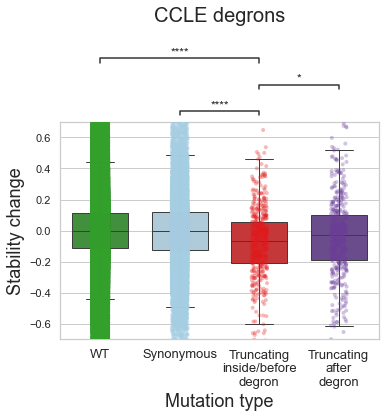

In [565]:
file = os.path.join(plots_path, "muttypes_bfaft_ccle_boxplot.png")

ax = stabch_plot(conditions, pairs, ccle_subset, dataset, ccle_stabch, -0.7, 0.7, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 5.7, fig_height = 4,
                plot_file = file, pad_stats = 100)

### 4C. Stability change median per E3 ligase (CPTAC): WT, trunc in/bf, trunc after

In [45]:
conditions = ["wt",
              "trunc_inbf_muts",
              "trunc_aft_muts"]

palette = {"wt": "#33a02c",
           "trunc_inbf_muts": "#e31a1c",
           "trunc_aft_muts": "#6a3d9a"}


In [14]:
dataset = "CPTAC"
file = os.path.join(plots_path, "stabch_trunc_cptac_boxplot.png")

cptac_subset = prepare_subsets_muttype_wthE3_dict(cptac_stabch, conditions, check_normality = False)

[[('SPOP', 'wt'), ('SPOP', 'trunc_inbf_muts')], [('SPOP', 'wt'), ('SPOP', 'trunc_aft_muts')], [('SPOP', 'trunc_inbf_muts'), ('SPOP', 'trunc_aft_muts')], [('DEG_APCC_TPR_1', 'wt'), ('DEG_APCC_TPR_1', 'trunc_inbf_muts')], [('DEG_APCC_TPR_1', 'wt'), ('DEG_APCC_TPR_1', 'trunc_aft_muts')], [('DEG_APCC_TPR_1', 'trunc_inbf_muts'), ('DEG_APCC_TPR_1', 'trunc_aft_muts')], [('APC_KENBOX', 'wt'), ('APC_KENBOX', 'trunc_inbf_muts')], [('APC_KENBOX', 'wt'), ('APC_KENBOX', 'trunc_aft_muts')], [('APC_KENBOX', 'trunc_inbf_muts'), ('APC_KENBOX', 'trunc_aft_muts')], [('CBL_PTK', 'wt'), ('CBL_PTK', 'trunc_inbf_muts')], [('CBL_PTK', 'wt'), ('CBL_PTK', 'trunc_aft_muts')], [('CBL_PTK', 'trunc_inbf_muts'), ('CBL_PTK', 'trunc_aft_muts')], [('FBXW7', 'wt'), ('FBXW7', 'trunc_inbf_muts')], [('FBXW7', 'wt'), ('FBXW7', 'trunc_aft_muts')], [('FBXW7', 'trunc_inbf_muts'), ('FBXW7', 'trunc_aft_muts')], [('CBL_MET', 'wt'), ('CBL_MET', 'trunc_inbf_muts')], [('CBL_MET', 'wt'), ('CBL_MET', 'trunc_aft_muts')], [('CBL_MET', '

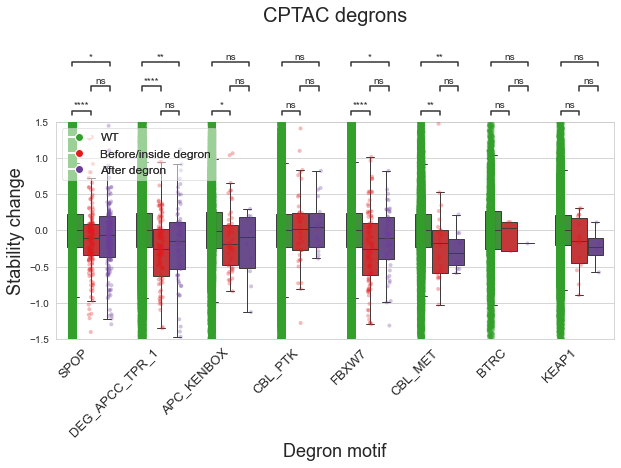

In [15]:
ax = stabch_E3ligase_boxplot(conditions, cptac_subset, dataset, cptac_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 10, fig_height = 4,
                plot_file = file, pad_stats = 100)

### S6C. Stability change median per E3 ligase (CCLE): WT, trunc in/bf, trunc after

In [47]:
dataset = "CCLE"
file = os.path.join(plots_path, "stabch_trunc_ccle_boxplot.png")

ccle_subset = prepare_subsets_muttype_wthE3_dict(ccle_stabch, conditions, check_normality = False)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FBXW7_trunc_inbf_muts vs. FBXW7_trunc_aft_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:3.891e-02 U_stat=1.398e+03
SPOP_wt vs. SPOP_trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:4.799e-06 U_stat=2.984e+07
SPOP_trunc_inbf_muts vs. SPOP_trunc_aft_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:5.171e-01 U_stat=6.656e+03
DEG_APCC_TPR_1_wt vs. DEG_APCC_TPR_1_trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:2.384e-06 U_stat=1.051e+07
DEG_APCC_TPR_1_trunc_inbf_muts vs. DEG_APCC_TPR_1_trunc_aft_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:7.888e-01 U_stat=2.354e+03
KEAP1_wt vs. KEAP1_trunc_inbf_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:2.178e-02 U_stat=2.674e+05
KEAP1_trunc_inbf_muts vs. KEAP1_trunc_aft_muts: Mann-Whitney-Wilcoxon test two-sided, P_val:1.666e-01 U_stat=

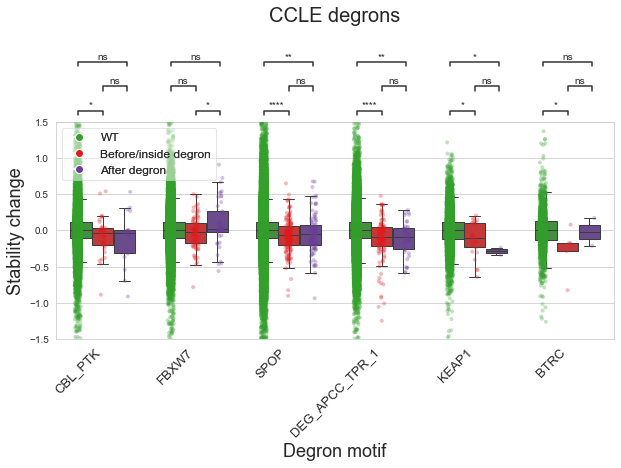

In [54]:
ax = stabch_E3ligase_boxplot(conditions, ccle_subset, dataset, ccle_stabch, -1.5, 1.5, palette, main_plot = "boxplot",
                do_stats = True, stripplot = True, annot_n = False, fig_width = 10, fig_height = 4,
                plot_file = file, pad_stats = 100)

### 4D. GATA3 stability change: needle plot with mutations matched to stability change oscillations (CPTAC)

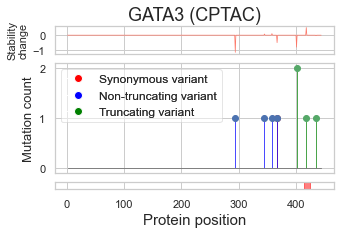

In [615]:
file = os.path.join(plots_path, "FBXW7_GATA3_needleplot.png")

dataset = "CPTAC"
E3 = "FBXW7"
gene = "GATA3"
start = 415            # int64 checked with dtype
end = 425
stabch_needle_plot(gene, small_proteome, cptac_stabch, "CPTAC", degron_start = start, degron_end = end,
                  degron_name = E3+" degron", degron_name_fontsize = 12, fig_width = 5, fig_height = 3,
                  plot_file = file)